<a href="https://colab.research.google.com/github/mariliabrito/gunviolence/blob/main/Viol%C3%AAncia_Escolar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="TAIL"><img src="https://i.imgur.com/GRTE0OG.png" width="150" title="Tail Logo" /></a>

# <font color ="#00b8ff">Análise de Violência Escolar</font>
## <font color ="#00b8ff">Trainees - 2022.2</font>



```
# Isto está formatado como código
```

## <font color ="#00b8ff">1. Introdução</font>

Fornecer um contexto do problema, trazer dados sobre violência escolar com armas, esclarecer os objetivos do trabalho, informar de onde pegamos o notebook e sua credibilidade, descrever as colunas do dataset, etc

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importando 4 abas do arquivo de excel
# As abas dos datasets são: incidente, atirador, vítima, arma.

df_incid = pd.read_excel("https://github.com/mariliabrito/gunviolence/blob/main/SSDB_Raw_Data_2022.xlsx?raw=true", sheet_name=1, parse_dates=["Date"]) #Rafael, Gisele e Dantas (Marília)
df_shoot = pd.read_excel("https://github.com/mariliabrito/gunviolence/blob/main/SSDB_Raw_Data_2022.xlsx?raw=true", sheet_name=2) #Hermano e Duda (Jonas)
df_victm = pd.read_excel("https://github.com/mariliabrito/gunviolence/blob/main/SSDB_Raw_Data_2022.xlsx?raw=true", sheet_name=3) #Hermano e Duda (Jonas)
df_weapn = pd.read_excel("https://github.com/mariliabrito/gunviolence/blob/main/SSDB_Raw_Data_2022.xlsx?raw=true", sheet_name=4) #Rafael, Gisele e Dantas (Marília)

In [ ]:
df_shoot.describe(include='all') #Esse comando inclui TODAS as colunas do referido dataset.

In [ ]:
df_weapn.describe(include='all') 

In [ ]:
df_victm.describe(include='all') 

In [ ]:
df_incid.describe(include='all') 

In [4]:
df_incid.head()

,Incident_ID,Sources,Number_News,Media_Attention,Reliability,Date,Quarter,School,City,State,...,Accomplice,Hostages,Barricade,Officer_Involved,Bullied,Domestic_Violence,Gang_Related,Preplanned,Shots_Fired,Active_Shooter_FBI
0,20220620ILGRC,https://www.cbsnews.com/chicago/news/woman-and...,50,National,4,2022-06-20,Summer,Gresham School of Excellence,Chicago,IL,...,No,No,No,No,No,No,NaN,No,100,No
1,20220613WAMAE,https://www.q13fox.com/news/deputies-arrest-15...,5,Local,4,2022-06-13,Summer,Mariner High School,Everett,WA,...,No,No,No,No,No,No,NaN,No,99,No
2,20220610ALBYB,https://www.actionnews5.com/2022/06/10/student...,3,Local,4,2022-06-10,Summer,Byhalia High School,Byhalia,MS,...,NaN,No,No,No,No,No,NaN,No,1,No
3,20220609ALWAG,https://www.live5news.com/2022/06/09/potential...,100,National,4,2022-06-09,Summer,Walnut Park Elementary School,Gadsden,AL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
4,20220608ARLIL,https://www.kark.com/crime/lrpd-school-bus-hit...,5,National,4,2022-06-08,Summer,Little Rock School District Bus,Little Rock,AR,...,NaN,No,No,No,No,No,NaN,No,99,No


In [ ]:
df_incid.info()

In [ ]:
df_shoot.head()

In [ ]:
df_victm.head()

In [ ]:
df_weapn.head()

## <font color ="#00b8ff">2. Limpeza</font>

Realizar limpeza e uniformização do dataset. Também é possível juntar datasets pela coluna incidentid.

In [ ]:
#Removendo valores duplicados caso existam
df_incid = df_incid.drop_duplicates()
df_shoot = df_shoot.drop_duplicates()
df_victm = df_victm.drop_duplicates()
df_weapn = df_weapn.drop_duplicates()

#Verificando
print(df_incid.isnull().sum())
print("="*27)
print(df_shoot.isnull().sum())
print("="*27)
print(df_victm.isnull().sum())
print("="*27)
print(df_weapn.isnull().sum())


In [16]:
#O tratamento de variáveis de tipo String do dataset 'Incidentes':
colunas_string=['Number_News','Media_Attention','School','School_Level','Location','Location_Type','During_School','First_Shot','Narrative','Situation','Targets','Accomplice','Hostages','Barricade','Officer_Involved','Bullied','Domestic_Violence','Gang_Related','Preplanned','Shots_Fired','Active_Shooter_FBI']

df_incid[colunas_string] = df_incid[colunas_string].fillna("Unknown")

#O tratamento de variáveis de tipo numérico, substituindo os valores nulos por 0.
df_incid['Reliability'] = df_incid['Reliability'].fillna(-1)
df_incid.isnull().sum()

#O tratamento da coluna de estações
seasons_dict = {
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Fall',
    10: 'Fall',
    11: 'Fall',
    12: 'Winter'
}

df_incid['Quarter'] = pd.to_datetime(df_incid['Date']).dt.month.map(seasons_dict)

def get_time_period(time_string):                             #Tentando preencher os períodos do dia com null a partir da hora do primeiro tiro
    if ':' in time_string:
        hour = int(time_string.split(':')[0])
        if hour < 12 and hour < 6:
          return 'Night'
        if hour < 12:
            return 'Morning'
        elif hour < 18:
            return 'Afternoon'
        else:
            return 'Night'
    else:
        if 'AM' in time_string:
            return 'Morning'
        else:
            return 'Afternoon/Night'

df_incid['Time_Period'].fillna(df_incid['First_Shot'].apply(get_time_period), inplace=True)

df_incid = df_incid.fillna('Unknown') #preenchendo o restante com 'Unknown'

In [6]:
#Nomeando meses
month_names = {
    1: 'Janeiro',
    2: 'Fevereiro',
    3: 'Março',
    4: 'Abril',
    5: 'Maio',
    6: 'Junho',
    7: 'Julho',
    8: 'Agosto',
    9: 'Setembro',
    10: 'Outubro',
    11: 'Novembro',
    12: 'Dezembro'
}

In [7]:
# Extraindo ano, mês e dia do dataset
df_incid['Year'] = df_incid['Date'].dt.year
df_incid['Month'] = pd.to_datetime(df_incid['Date']).dt.month.map(month_names)
df_incid['Day'] = df_incid['Date'].dt.day

In [ ]:
df_incid['Time_Period'].value_counts()

In [ ]:
df_incid['Quarter'].value_counts()

In [ ]:
df_shoot.describe()

In [ ]:
df_weapn.describe()

In [ ]:
df_weapn["weaponcaliber"].value_counts()

In [ ]:
df_weapn.loc[df_weapn["weaponcaliber"] == '.22 caliber ',"weaponcaliber"] = '.22 caliber' #renomeando o .22 que estava com um espaço no final
df_weapn.loc[df_weapn["weaponcaliber"] == 'airsoft',"weaponcaliber"] = 'Airsoft' #renomeando os "airsoft" minúsculos
df_weapn.loc[df_weapn["weaponcaliber"] == 'Service weapon',"weaponcaliber"] = 'Service Weapon' 

In [ ]:
df_weapn["weaponcaliber"].value_counts()

In [ ]:
df_weapn["weaponcaliber"].unique()


In [ ]:
df_shoot = df_shoot.fillna('Unknown') #Preenchendo as informações nulas da aba atirador
df_weapn = df_weapn.fillna('Unknown') #Preenchendo as informações nulas da aba arma

In [ ]:
df_shoot.isnull().sum() 

In [ ]:
#Preenchendo os valores nulos da coluna de gênero com Unknown
df_victm['gender'] = df_victm['gender'].fillna('Unknown') 
df_victm['schoolaffiliation'] = df_victm['schoolaffiliation'].fillna('Unknown')
df_victm['race'] = df_victm['race'].fillna('Unknown')

In [ ]:
df_shoot["age"].unique()

In [ ]:
#Classificando as vítimas em Adulto, Adolescente e Criança
def classify_age(age):
    if isinstance(age, str):
        if age.strip() == '':
            return 'Unknown'
        else:
            return age
    else:
        if age < 0:
            return 'Invalid'
        elif age <= 12:
            return 'Child'
        elif age <= 20:
            return 'Teen'
        elif age >20:
            return 'Adult'
        else:
          return 'Unknown'

df_incid['age'] = pd.to_numeric(df_shoot['age'], errors='coerce')
df_incid['ageclass'] = df_incid['age'].apply(classify_age)
df_incid['ageclass'].value_counts()

Teen       912
Unknown    820
Adult      281
Child       56
Name: ageclass, dtype: int64

In [ ]:
#Classificando as vítimas em Adulto, Adolescente e Criança
def classify_age(age):
    if isinstance(age, str):
        if age.strip() == '':
            return 'Unknown'
        else:
            return age
    else:
        if age < 0:
            return 'Invalid'
        elif age <= 12:
            return 'Child'
        elif age <= 19:
            return 'Teen'
        else:
            return 'Adult'

df_victm['age'] = pd.to_numeric(df_victm['age'], errors='coerce')
df_victm['ageclass'] = df_victm['age'].apply(classify_age)

df_victm

,incidentid,race,injury,gender,schoolaffiliation,age,ageclass,ageinterp
0,20220620ILGRC,Unknown,Wounded,Female,No Relation,34.0,Adult,34.0
1,20220620ILGRC,Unknown,Wounded,Male,No Relation,16.0,Teen,16.0
2,20220620ILGRC,Unknown,Wounded,Female,No Relation,17.0,Teen,17.0
3,20220609ALWAG,Black,Fatal,Male,No Relation,32.0,Adult,32.0
4,20220605INWEG,Unknown,Wounded,Male,Unknown,19.0,Teen,19.0
...,...,...,...,...,...,...,...,...
3094,19700323CADAL,Unknown,Wounded,Male,Student,16.0,Teen,16.0
3095,19700206OHJOC,Unknown,Wounded,Male,Student,18.0,Teen,18.0
3096,19700105DCUNW,Unknown,None,Male,Unknown,16.0,Teen,16.0
3097,19700105DCSOW,Unknown,Wounded,Male,Student,NaN,Adult,16.0


<Axes: >

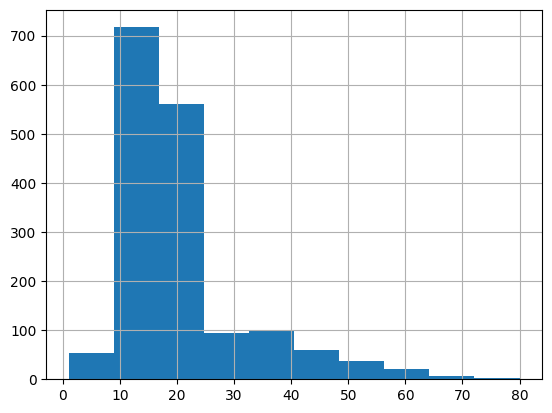

In [ ]:
df_victm['age'].hist() #analisando a distribuição 

Axes(0.125,0.11;0.775x0.77)


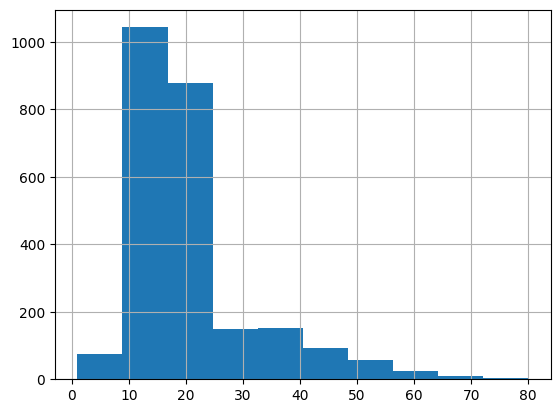

In [ ]:
nan_interpol = df_victm['age'].fillna(df_victm['age'].interpolate(method='nearest')) #verificando a coerência da interpolação das idades
print(nan_interpol.hist())
df_victm['ageinterp'] = df_victm['age'].fillna(df_victm['age'].interpolate(method='nearest'))

Verificação final de valores null

In [ ]:
print(df_incid.isnull().sum())
print("="*27)
print(df_shoot.isnull().sum())
print("="*27)
print(df_victm.isnull().sum()) #Na coluna ['age'] ainda existem valores null pq estes não foram substituídos, preferimos criar uma nova coluna com valores interpolados
print("="*27)
print(df_weapn.isnull().sum())

Incident_ID           0
Sources               0
Number_News           0
Media_Attention       0
Reliability           0
Date                  0
Quarter               0
School                0
City                  0
State                 0
School_Level          0
Location              0
Location_Type         0
During_School         0
Time_Period           0
First_Shot            0
Summary               0
Narrative             0
Situation             0
Targets               0
Accomplice            0
Hostages              0
Barricade             0
Officer_Involved      0
Bullied               0
Domestic_Violence     0
Gang_Related          0
Preplanned            0
Shots_Fired           0
Active_Shooter_FBI    0
Year                  0
Month                 0
Day                   0
dtype: int64
incidentid           0
age                  0
gender               0
race                 0
schoolaffiliation    0
shooteroutcome       0
shooterdied          0
injury               0
chargesfile

## <font color ="#00b8ff">3. Análise Descritiva</font>

Realizar análise do dataset, mostrar série histórica, trazer visualizações, etc

### <font color ="#00b8ff">3.1 Análise de série histórica e geográfica - Duda e Gisele</font>




<Axes: xlabel='Year', ylabel='count'>

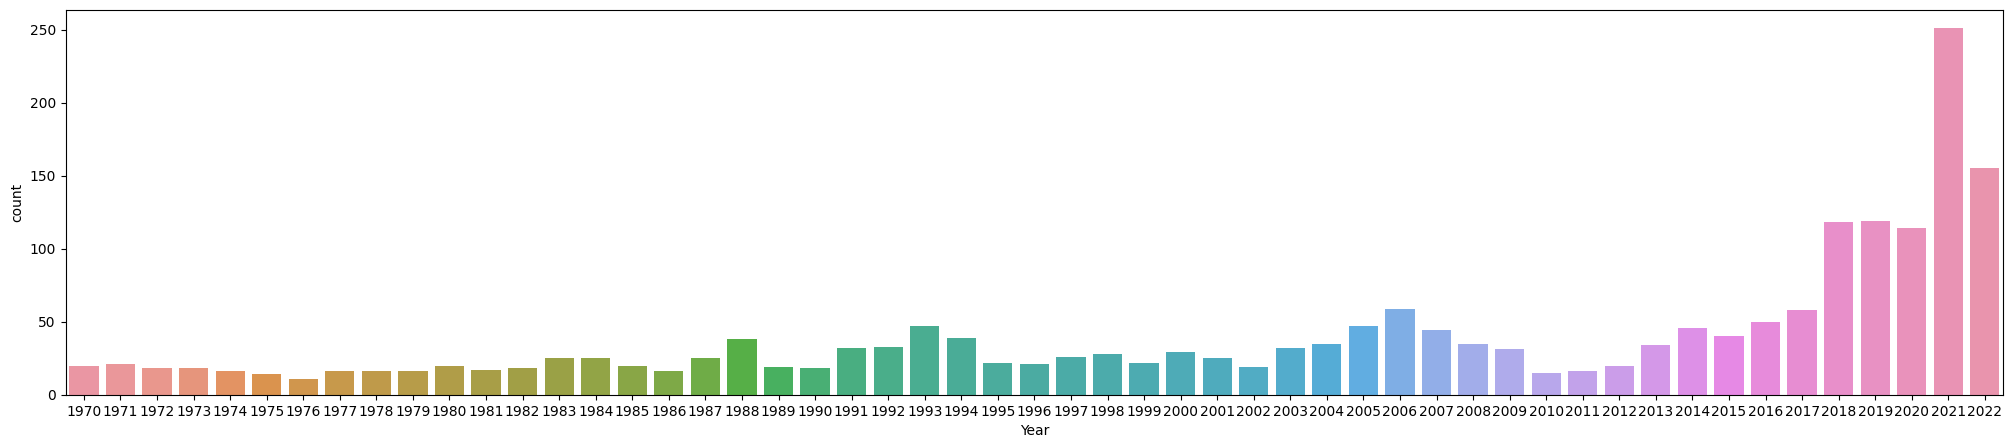

In [9]:
fig = plt.figure(figsize=(25,5))
sns.countplot(x=df_incid["Year"])

<Axes: xlabel='State', ylabel='count'>

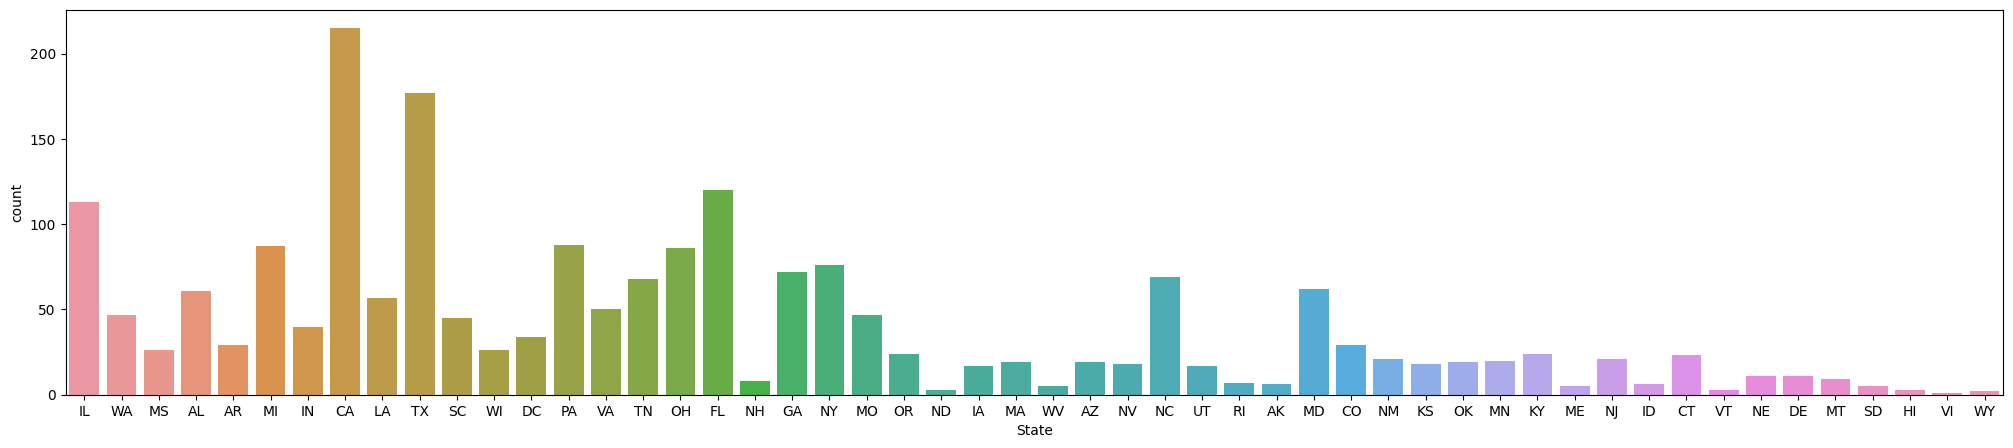

In [10]:
fig = plt.figure(figsize=(25,5))
sns.countplot(x=df_incid["State"])

<Axes: xlabel='Year', ylabel='count'>

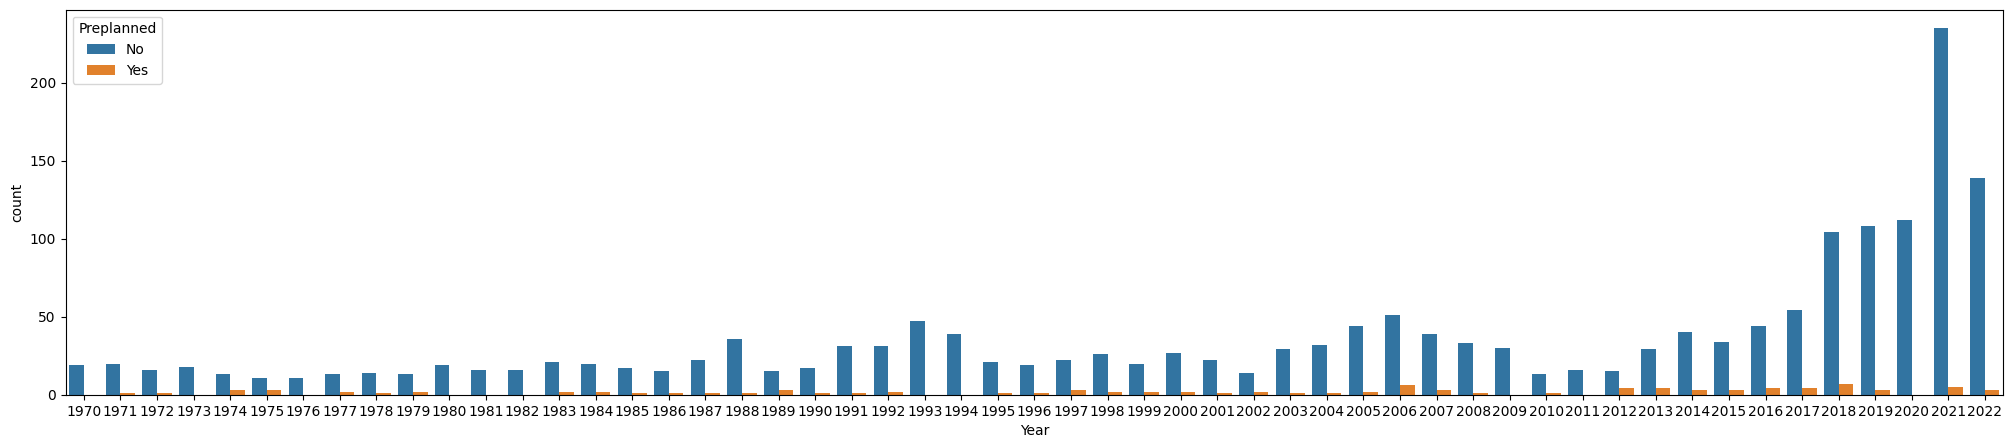

In [14]:
fig = plt.figure(figsize=(25,5))
sns.countplot(x=df_incid["Year"], hue=df_incid['Preplanned'])

<Axes: xlabel='Year', ylabel='count'>

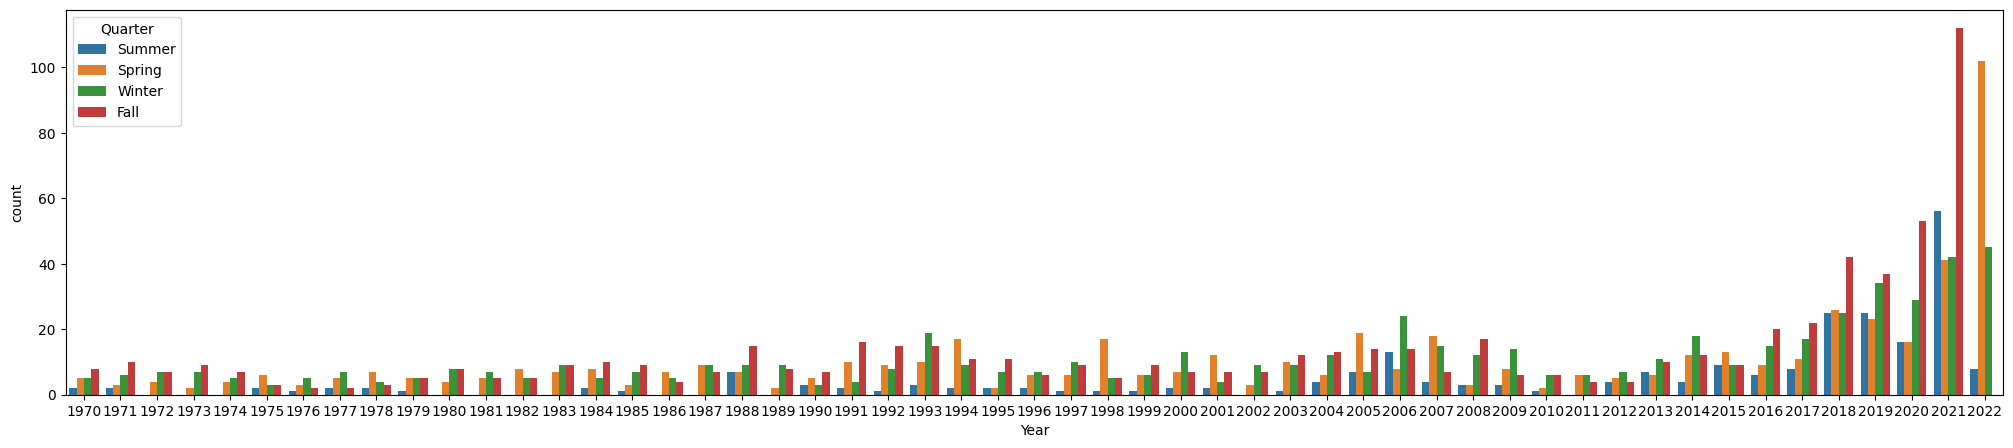

In [45]:
fig = plt.figure(figsize=(25,5))
sns.countplot(x=df_incid["Year"], hue=df_incid['Quarter'])

In [25]:
df_incid["Year"].value_counts().values

array([251, 155, 119, 118, 114,  59,  58,  50,  47,  47,  46,  44,  40,
        39,  38,  35,  35,  34,  33,  32,  32,  31,  29,  28,  26,  25,
        25,  25,  25,  22,  22,  21,  21,  20,  20,  20,  20,  19,  19,
        18,  18,  18,  18,  17,  16,  16,  16,  16,  16,  16,  15,  14,
        11])

### <font color ="#00b8ff">3.2 Análise dos Incidentes - João Victor, Hermano e Raffael</font>

In [ ]:
df_incid.head()

,Incident_ID,Sources,Number_News,Media_Attention,Reliability,Date,Quarter,School,City,State,...,Officer_Involved,Bullied,Domestic_Violence,Gang_Related,Preplanned,Shots_Fired,Active_Shooter_FBI,Year,Month,Day
0,20220620ILGRC,https://www.cbsnews.com/chicago/news/woman-and...,50,National,4,2022-06-20,Summer,Gresham School of Excellence,Chicago,IL,...,No,No,No,Unknown,No,100,No,2022,Junho,20
1,20220613WAMAE,https://www.q13fox.com/news/deputies-arrest-15...,5,Local,4,2022-06-13,Summer,Mariner High School,Everett,WA,...,No,No,No,Unknown,No,99,No,2022,Junho,13
2,20220610ALBYB,https://www.actionnews5.com/2022/06/10/student...,3,Local,4,2022-06-10,Summer,Byhalia High School,Byhalia,MS,...,No,No,No,Unknown,No,1,No,2022,Junho,10
3,20220609ALWAG,https://www.live5news.com/2022/06/09/potential...,100,National,4,2022-06-09,Summer,Walnut Park Elementary School,Gadsden,AL,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,No,2022,Junho,9
4,20220608ARLIL,https://www.kark.com/crime/lrpd-school-bus-hit...,5,National,4,2022-06-08,Summer,Little Rock School District Bus,Little Rock,AR,...,No,No,No,Unknown,No,99,No,2022,Junho,8


In [ ]:
df_incid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2069 entries, 0 to 2068
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Incident_ID         2069 non-null   object        
 1   Sources             2069 non-null   object        
 2   Number_News         2069 non-null   object        
 3   Media_Attention     2069 non-null   object        
 4   Reliability         2069 non-null   int64         
 5   Date                2069 non-null   datetime64[ns]
 6   Quarter             2069 non-null   object        
 7   School              2069 non-null   object        
 8   City                2069 non-null   object        
 9   State               2069 non-null   object        
 10  School_Level        2069 non-null   object        
 11  Location            2069 non-null   object        
 12  Location_Type       2069 non-null   object        
 13  During_School       2069 non-null   object      

In [ ]:
df_incid.describe()

,Reliability,Year,Day
count,2069.000000,2069.000000,2069.000000
mean,2.766554,2005.714355,15.745771
std,0.996184,15.432015,8.732714
min,1.000000,1970.000000,1.000000
25%,2.000000,1993.000000,9.000000
50%,2.000000,2010.000000,15.000000
75%,4.000000,2020.000000,23.000000
max,5.000000,2022.000000,31.000000


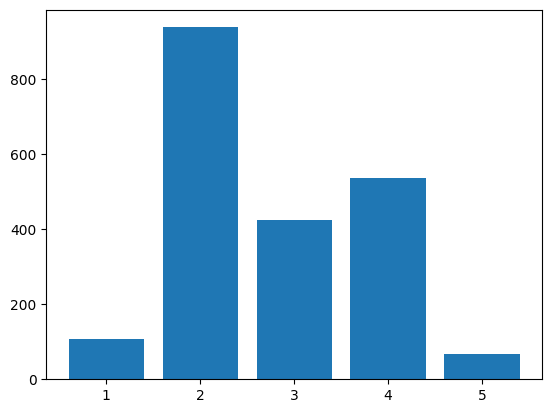

In [ ]:
df_incid['Reliability'].value_counts()
confiabilidade = df_incid['Reliability'].value_counts()
plt.bar(confiabilidade.index, confiabilidade.values)
plt.show()

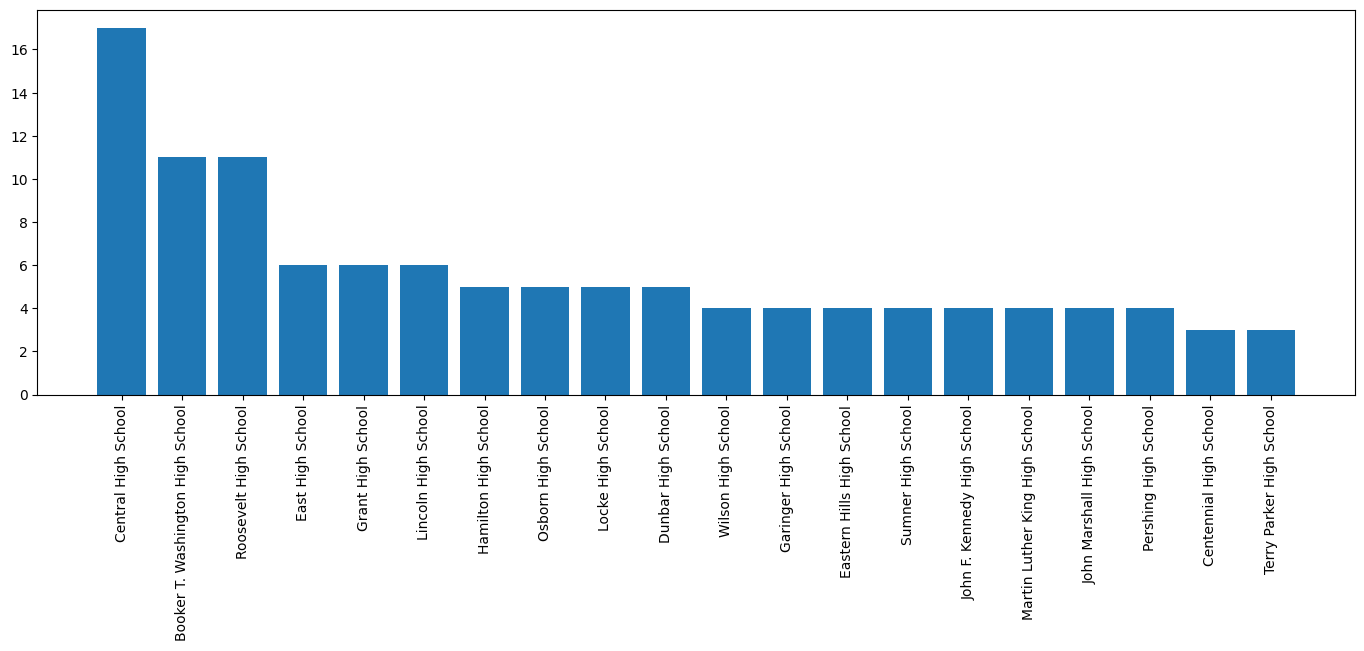

In [ ]:
escola20 = df_incid['School'].value_counts().head(20)
fig = plt.figure(figsize=(17, 5))
plt.bar(escola20.index, escola20.values)
plt.xticks(rotation=90)
plt.show()

### <font color ="#00b8ff">3.3 Análise do Violentador</font>

### <font color ="#00b8ff">3.4 Análise das Vítimas</font>

### <font color ="#00b8ff">3.5 Análise das Armas</font>

### <font color ="#00b8ff">3.6 Regressão Linear</font>